In [0]:
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext
import collections
import pyspark.sql.functions as f

In [0]:
# Load and pre-process the dataset.
spark = SparkSession.builder.appName('Housing').getOrCreate()

In [0]:
housing = spark.read.csv('/FileStore/tables/housing.csv', inferSchema = True, header = True)

In [0]:
housing.columns

Out[185]: ['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [0]:
# Selecting the dependent and the independent variables that are identified as most useful attributes to make predictions
house = housing.select(['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'ocean_proximity'])

In [0]:
# Drop the Null rows.
house = house.dropna()

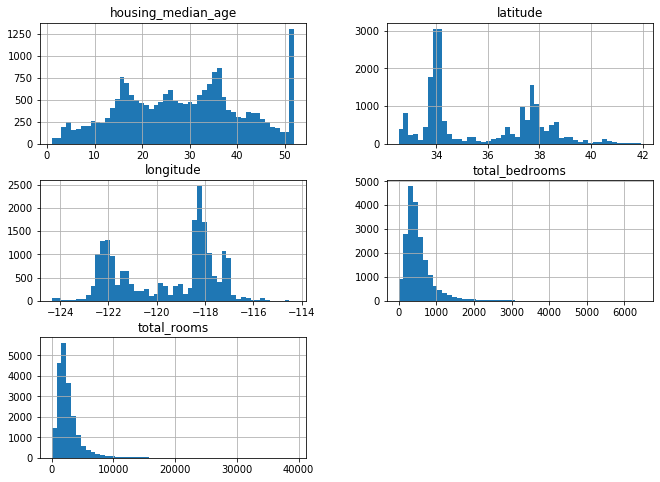

In [0]:
# Plot the variables.
import matplotlib.pyplot as plt
import pandas as pd
pdf1=house.toPandas()
pdf1.hist(bins=50, figsize=(11,8))
save_fig("histograms")
plt.show()

In [0]:
# Create a 70-30 train/test split
train_data, test_data = house.randomSplit([0.7,0.3])

In [0]:
# Import the Vector Assembler, String Indexer and Standard Scaler
from pyspark.ml.feature import VectorAssembler, StringIndexer, StandardScaler, MinMaxScaler
from pyspark.ml import Pipeline

In [0]:
#Use StringIndexer to convert categorical column to hold numerical data.
ocean_proximity_indexer = StringIndexer(inputCol = 'ocean_proximity', outputCol = 'ocean_proximity_index', handleInvalid = 'keep')

In [0]:
numeric_col = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms']
assembler = VectorAssembler (inputCols = numeric_col, outputCol = "vector_features")
scaler = StandardScaler(inputCol = "vector_features", outputCol = "features")

In [0]:
# Create a Random Forest Model on the transformed data.
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier (labelCol = 'ocean_proximity_index', maxDepth = 22, seed =42)

In [0]:
# Pipeline is used to pass the data through the Indexer, Scaler, and Assembler simultaneously
rf_pipe = Pipeline(stages =[ocean_proximity_indexer, assembler, scaler, rf])

In [0]:
#Fit Randomforest model on the train data
rf_fit_model=rf_pipe.fit(train_data)

In [0]:
RF_results = rf_fit_model.transform(test_data)
display(RF_results)

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,ocean_proximity,ocean_proximity_index,vector_features,features,rawPrediction,probability,prediction
-124.35,40.54,52,1820,300,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.35, 40.54, 52.0, 1820.0, 300.0))","List(1, 5, List(), List(-62.01084429088884, 18.976807792627923, 4.141722908617632, 0.826732267819461, 0.7153551572699747))","List(1, 5, List(), List(6.958770396270396, 0.0, 13.041229603729603, 0.0, 0.0))","List(1, 5, List(), List(0.3479385198135198, 0.0, 0.6520614801864801, 0.0, 0.0))",2.0
-124.3,41.8,19,2672,552,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.3, 41.8, 19.0, 2672.0, 552.0))","List(1, 5, List(), List(-61.98591029640115, 19.566614842916803, 1.513321831994904, 1.2137519887986812, 1.3162534893767535))","List(1, 5, List(), List(0.0, 6.211111111111111, 13.78888888888889, 0.0, 0.0))","List(1, 5, List(), List(0.0, 0.3105555555555556, 0.6894444444444445, 0.0, 0.0))",2.0
-124.23,41.75,11,3159,616,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.23, 41.75, 11.0, 3159.0, 616.0))","List(1, 5, List(), List(-61.95100270411838, 19.543209801238675, 0.876133692207576, 1.4349710077152071, 1.4688625895943481))","List(1, 5, List(), List(4.0, 3.111111111111111, 12.88888888888889, 0.0, 0.0))","List(1, 5, List(), List(0.2, 0.15555555555555556, 0.6444444444444445, 0.0, 0.0))",2.0
-124.21,41.75,20,3810,787,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.21, 41.75, 20.0, 3810.0, 787.0))","List(1, 5, List(), List(-61.9410291063233, 19.543209801238675, 1.59297034946832, 1.7306867804352453, 1.8766150292382338))","List(1, 5, List(), List(0.0, 18.0, 2.0, 0.0, 0.0))","List(1, 5, List(), List(0.0, 0.9, 0.1, 0.0, 0.0))",1.0
-124.21,41.77,17,3461,722,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.21, 41.77, 17.0, 3461.0, 722.0))","List(1, 5, List(), List(-61.9410291063233, 19.55257181790993, 1.354024797048072, 1.5721540543533814, 1.721621411829739))","List(1, 5, List(), List(3.0, 7.111111111111111, 9.88888888888889, 0.0, 0.0))","List(1, 5, List(), List(0.15, 0.3555555555555555, 0.49444444444444446, 0.0, 0.0))",2.0
-124.19,40.73,21,5694,1056,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.19, 40.73, 21.0, 5694.0, 1056.0))","List(1, 5, List(), List(-61.931055508528225, 19.06574695100482, 1.6726188669417361, 2.586490952178028, 2.518050153590311))","List(1, 5, List(), List(12.0, 6.0, 2.0, 0.0, 0.0))","List(1, 5, List(), List(0.6, 0.3, 0.1, 0.0, 0.0))",0.0
-124.19,40.78,37,1371,319,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.19, 40.78, 37.0, 1371.0, 319.0))","List(1, 5, List(), List(-61.931055508528225, 19.08915199268295, 2.946995146516392, 0.6227746918574071, 0.7606609838970732))","List(1, 5, List(), List(2.9111111111111114, 0.0, 17.08888888888889, 0.0, 0.0))","List(1, 5, List(), List(0.14555555555555558, 0.0, 0.8544444444444445, 0.0, 0.0))",2.0
-124.18,40.79,40,1398,311,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.18, 40.79, 40.0, 1398.0, 311.0))","List(1, 5, List(), List(-61.92606870963069, 19.093833001018574, 3.18594069893664, 0.6350394013250584, 0.7415848463698738))","List(1, 5, List(), List(1.988034188034188, 0.0, 18.011965811965812, 0.0, 0.0))","List(1, 5, List(), List(0.0994017094017094, 0.0, 0.9005982905982906, 0.0, 0.0))",2.0
-124.17,40.62,32,1595,309,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.17, 40.62, 32.0, 1595.0, 309.0))","List(1, 5, List(), List(-61.92108191073315, 19.014255859312932, 2.548752559149312, 0.7245263555890331, 0.736815811988074))","List(1, 5, List(), List(4.111111111111111, 5.0, 10.88888888888889, 0.0, 0.0))","List(1, 5, List(), List(0.20555555555555555, 0.25, 0.5444444444444445, 0.0, 0.0))",2.0
-124.17,40.74,17,2026,338,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.17, 40.74, 17.0, 2026.0, 338.0))","List(1, 5, List(), List(-61.92108191073315, 19.070427959340446, 1.354024797048072, 0.9203074585726527, 0.8059668105241715))","List(1, 5, List(), List(10.500000000000002, 8.166666666666668, 1.3333333333333333, 0.0, 0.0))","List(1, 5, List(), List(0.525, 0.4083333333333333, 

In [0]:
# Evaluate and display the Random Forest model accuracy.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
RF_evaluator = MulticlassClassificationEvaluator(
    labelCol="ocean_proximity_index", predictionCol="prediction", metricName="accuracy")

RF_accuracy = RF_evaluator.evaluate(RF_results)

#multiply by 100 to get a percentage and round to 2 decimals
RF_accuracy = round(RF_accuracy*100,2)

print("The accuracy of the Random Forest Classifier is {}%".format(RF_accuracy))

The accuracy of the Random Forest Classifier is 92.63%

In [0]:
# Neural Network Model 
#import the MultilayerPerceptronClassifier and establish the model parameters
from pyspark.ml.classification import MultilayerPerceptronClassifier

layers = [5, 20, 20, 20, 5]

# create the model object and set its parameters
mlp_model = MultilayerPerceptronClassifier(labelCol='ocean_proximity_index'
                                           ,maxIter=1000
                                           , layers=layers
                                           , blockSize=128
                                           , seed=1234)

In [0]:
# Run the Neural Network pipeline to pass data through the indexer and assembler.
mlp_pipe = Pipeline(stages =[ocean_proximity_indexer, assembler, scaler, mlp_model])

In [0]:
# Fit the NN model to training dataset.
mlp_fit_model = mlp_pipe.fit(train_data)

In [0]:
# Display Neural Network results of the transformed data.
NN_results = mlp_fit_model.transform(test_data)
display(NN_results)

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,ocean_proximity,ocean_proximity_index,vector_features,features,rawPrediction,probability,prediction
-124.35,40.54,52,1820,300,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.35, 40.54, 52.0, 1820.0, 300.0))","List(1, 5, List(), List(-62.01084429088884, 18.976807792627923, 4.141722908617632, 0.826732267819461, 0.7153551572699747))","List(1, 5, List(), List(-0.48331369162165805, 0.2724439562566565, 0.01766910022540147, 1.2378747113206892, -1.3249422424284927))","List(1, 5, List(), List(0.09257764606844268, 0.19711855647468915, 0.15278481617436135, 0.5176172721430283, 0.03990170913947846))",3.0
-124.3,41.8,19,2672,552,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.3, 41.8, 19.0, 2672.0, 552.0))","List(1, 5, List(), List(-61.98591029640115, 19.566614842916803, 1.513321831994904, 1.2137519887986812, 1.3162534893767535))","List(1, 5, List(), List(0.7787730353774975, 2.0750418632011076, -0.8525829968061482, -0.7775370061177789, -1.3669703594980687))","List(1, 5, List(), List(0.19308040732026163, 0.7058307996424169, 0.03777889782712871, 0.0407231480482962, 0.02258674716189657))",1.0
-124.23,41.75,11,3159,616,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.23, 41.75, 11.0, 3159.0, 616.0))","List(1, 5, List(), List(-61.95100270411838, 19.543209801238675, 0.876133692207576, 1.4349710077152071, 1.4688625895943481))","List(1, 5, List(), List(1.0164306208546736, 2.4293355762482056, -1.0225166821788334, -1.1637699503616297, -1.3756852169955056))","List(1, 5, List(), List(0.18373936698458526, 0.7547776669813098, 0.023916556666107727, 0.020766013800475155, 0.016800395567522233))",1.0
-124.21,41.75,20,3810,787,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.21, 41.75, 20.0, 3810.0, 787.0))","List(1, 5, List(), List(-61.9410291063233, 19.543209801238675, 1.59297034946832, 1.7306867804352453, 1.8766150292382338))","List(1, 5, List(), List(0.7040387950950096, 1.965072489111748, -0.7997327272659391, -0.6567356946931433, -1.3643077037510671))","List(1, 5, List(), List(0.19477176266024263, 0.6873627128329926, 0.04329585499367518, 0.04995156996694569, 0.02461809954614383))",1.0
-124.21,41.77,17,3461,722,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.21, 41.77, 17.0, 3461.0, 722.0))","List(1, 5, List(), List(-61.9410291063233, 19.55257181790993, 1.354024797048072, 1.5721540543533814, 1.721621411829739))","List(1, 5, List(), List(0.8085373684865558, 2.1190171290816897, -0.8737042813598941, -0.8257288572885271, -1.3680403722053074))","List(1, 5, List(), List(0.19221774182414855, 0.712734201541789, 0.035744169023818585, 0.037500811610153686, 0.02180307600009016))",1.0
-124.19,40.73,21,5694,1056,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.19, 40.73, 21.0, 5694.0, 1056.0))","List(1, 5, List(), List(-61.931055508528225, 19.06574695100482, 1.6726188669417361, 2.586490952178028, 2.518050153590311))","List(1, 5, List(), List(0.403760595513996, 1.528797090033451, -0.5896687852793359, -0.1738750028454703, -1.3539076849606346))","List(1, 5, List(), List(0.19288991913144957, 0.5941644622459903, 0.07142802348987796, 0.10825440518774536, 0.0332631899449369))",1.0
-124.19,40.78,37,1371,319,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.19, 40.78, 37.0, 1371.0, 319.0))","List(1, 5, List(), List(-61.931055508528225, 19.08915199268295, 2.946995146516392, 0.6227746918574071, 0.7606609838970732))","List(1, 5, List(), List(0.025412470592051317, 0.9886994342896727, -0.3289295526613025, 0.43020178218522087, -1.3413181225334203))","List(1, 5, List(), List(0.1645858666514169, 0.4312635479717553, 0.1154791964575125, 0.24671201650666627, 0.041959372412649076))",1.0
-124.18,40.79,40,1398,311,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.18, 40.79, 40.0, 1398.0, 311.0))","List(1, 5, List(), List(-61.92606870963069, 19.093833001018574, 3.18594069893664, 0.6350394013250584, 0.7415848463698738))","List(1, 5, List(), List(-0.05150156707230069, 0.8798503215013458, -0.27630903447805766, 0.5525748340030976, -1.3388102160585784))","List(1, 

In [0]:
NN_results.select(['ocean_proximity_index', 'prediction']).show()

+---------------------+----------+
ocean_proximity_index|prediction|
+---------------------+----------+
 2.0| 3.0|
 2.0| 1.0|
 2.0| 1.0|
 2.0| 1.0|
 2.0| 1.0|
 2.0| 1.0|
 2.0| 1.0|
 2.0| 1.0|
 2.0| 1.0|
 2.0| 1.0|
 2.0| 1.0|
 2.0| 3.0|
 2.0| 1.0|
 2.0| 1.0|
 2.0| 3.0|
 2.0| 1.0|
 0.0| 1.0|
 2.0| 1.0|
 2.0| 1.0|
 2.0| 1.0|
+---------------------+----------+
only showing top 20 rows

In [0]:
# Evaluate and display the Neural Network model accuracy.
NN_evaluator = MulticlassClassificationEvaluator(
    labelCol="ocean_proximity_index", predictionCol="prediction", metricName="accuracy")

NN_accuracy = NN_evaluator.evaluate(NN_results)

#multiply by 100 to get a percentage and round to 2 decimals
NN_accuracy = round(NN_accuracy*100,2)

print("The accuracy of the Neural Network Multilayer Perceptron Classifier is {}%".format(NN_accuracy))

The accuracy of the Neural Network Multilayer Perceptron Classifier is 71.94%

In [0]:
# Import the DecisionTreeClassifier and set the model
from pyspark.ml.classification import DecisionTreeClassifier
dt_model = DecisionTreeClassifier (labelCol = 'ocean_proximity_index', maxBins = 22600)

In [0]:
# Run Pipeline for the Decision Tree
dt_pipe = Pipeline(stages = [ocean_proximity_indexer, assembler, scaler, dt_model])

In [0]:
# Fit the Decision Tree model to the training dataset 
dt_fit_model = dt_pipe.fit(train_data)

In [0]:
# Display Decision Tree results of the transformed data.
DT_results = dt_fit_model.transform(test_data)
display(DT_results)

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,ocean_proximity,ocean_proximity_index,vector_features,features,rawPrediction,probability,prediction
-124.35,40.54,52,1820,300,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.35, 40.54, 52.0, 1820.0, 300.0))","List(1, 5, List(), List(-62.01084429088884, 18.976807792627923, 4.141722908617632, 0.826732267819461, 0.7153551572699747))","List(1, 5, List(), List(251.0, 100.0, 88.0, 0.0, 0.0))","List(1, 5, List(), List(0.571753986332574, 0.22779043280182232, 0.20045558086560364, 0.0, 0.0))",0.0
-124.3,41.8,19,2672,552,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.3, 41.8, 19.0, 2672.0, 552.0))","List(1, 5, List(), List(-61.98591029640115, 19.566614842916803, 1.513321831994904, 1.2137519887986812, 1.3162534893767535))","List(1, 5, List(), List(251.0, 100.0, 88.0, 0.0, 0.0))","List(1, 5, List(), List(0.571753986332574, 0.22779043280182232, 0.20045558086560364, 0.0, 0.0))",0.0
-124.23,41.75,11,3159,616,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.23, 41.75, 11.0, 3159.0, 616.0))","List(1, 5, List(), List(-61.95100270411838, 19.543209801238675, 0.876133692207576, 1.4349710077152071, 1.4688625895943481))","List(1, 5, List(), List(251.0, 100.0, 88.0, 0.0, 0.0))","List(1, 5, List(), List(0.571753986332574, 0.22779043280182232, 0.20045558086560364, 0.0, 0.0))",0.0
-124.21,41.75,20,3810,787,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.21, 41.75, 20.0, 3810.0, 787.0))","List(1, 5, List(), List(-61.9410291063233, 19.543209801238675, 1.59297034946832, 1.7306867804352453, 1.8766150292382338))","List(1, 5, List(), List(251.0, 100.0, 88.0, 0.0, 0.0))","List(1, 5, List(), List(0.571753986332574, 0.22779043280182232, 0.20045558086560364, 0.0, 0.0))",0.0
-124.21,41.77,17,3461,722,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.21, 41.77, 17.0, 3461.0, 722.0))","List(1, 5, List(), List(-61.9410291063233, 19.55257181790993, 1.354024797048072, 1.5721540543533814, 1.721621411829739))","List(1, 5, List(), List(251.0, 100.0, 88.0, 0.0, 0.0))","List(1, 5, List(), List(0.571753986332574, 0.22779043280182232, 0.20045558086560364, 0.0, 0.0))",0.0
-124.19,40.73,21,5694,1056,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.19, 40.73, 21.0, 5694.0, 1056.0))","List(1, 5, List(), List(-61.931055508528225, 19.06574695100482, 1.6726188669417361, 2.586490952178028, 2.518050153590311))","List(1, 5, List(), List(251.0, 100.0, 88.0, 0.0, 0.0))","List(1, 5, List(), List(0.571753986332574, 0.22779043280182232, 0.20045558086560364, 0.0, 0.0))",0.0
-124.19,40.78,37,1371,319,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.19, 40.78, 37.0, 1371.0, 319.0))","List(1, 5, List(), List(-61.931055508528225, 19.08915199268295, 2.946995146516392, 0.6227746918574071, 0.7606609838970732))","List(1, 5, List(), List(251.0, 100.0, 88.0, 0.0, 0.0))","List(1, 5, List(), List(0.571753986332574, 0.22779043280182232, 0.20045558086560364, 0.0, 0.0))",0.0
-124.18,40.79,40,1398,311,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.18, 40.79, 40.0, 1398.0, 311.0))","List(1, 5, List(), List(-61.92606870963069, 19.093833001018574, 3.18594069893664, 0.6350394013250584, 0.7415848463698738))","List(1, 5, List(), List(251.0, 100.0, 88.0, 0.0, 0.0))","List(1, 5, List(), List(0.571753986332574, 0.22779043280182232, 0.20045558086560364, 0.0, 0.0))",0.0
-124.17,40.62,32,1595,309,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.17, 40.62, 32.0, 1595.0, 309.0))","List(1, 5, List(), List(-61.92108191073315, 19.014255859312932, 2.548752559149312, 0.7245263555890331, 0.736815811988074))","List(1, 5, List(), List(251.0, 100.0, 88.0, 0.0, 0.0))","List(1, 5, List(), List(0.571753986332574, 0.22779043280182232, 0.20045558086560364, 0.0, 0.0))",0.0
-124.17,40.74,17,2026,338,NEAR OCEAN,2.0,"List(1, 5, List(), List(-124.17, 40.74, 17.0, 2026.0, 338.0))","List(1, 5, List(), List(-61.92108191073315, 19.070427959340446, 1.354024797048072, 0.9203074585726527, 0.8059668105241715))","List(1, 5, List(), List(251.0, 100.0, 88.0, 0.0, 0.0))","List(1, 5, List(), List(0.571753986332574, 0.22

In [0]:
DT_results.select(['ocean_proximity_index', 'prediction']).show()

+---------------------+----------+
ocean_proximity_index|prediction|
+---------------------+----------+
 2.0| 0.0|
 2.0| 0.0|
 2.0| 0.0|
 2.0| 0.0|
 2.0| 0.0|
 2.0| 0.0|
 2.0| 0.0|
 2.0| 0.0|
 2.0| 0.0|
 2.0| 0.0|
 2.0| 0.0|
 2.0| 0.0|
 2.0| 0.0|
 2.0| 0.0|
 2.0| 0.0|
 2.0| 0.0|
 0.0| 0.0|
 2.0| 0.0|
 2.0| 0.0|
 2.0| 0.0|
+---------------------+----------+
only showing top 20 rows

In [0]:
DT_evaluator = MulticlassClassificationEvaluator(labelCol = "ocean_proximity_index", predictionCol = "prediction", metricName = "accuracy")

In [0]:
DT_accuracy = DT_evaluator.evaluate(DT_results)
print("The accuracy of the Decision Tree Classifier is {}".format(DT_accuracy))

The accuracy of the Decision Tree Classifier is 0.8700419219606579